<a href="https://colab.research.google.com/github/yslikitha/Fraud-Detection-in-Financial-Transactions/blob/main/creditcard2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Importing all Necessary libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec


2. Loading dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Navigate to data directory
import os
os.chdir('/content/drive/My Drive/GFGCreditcard')
dataset_path = '/content/drive/My Drive/GFGCreditcard/creditcard.csv'
data = pd.read_csv(dataset_path)

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


3. Exploratory Data Analysis

In [ ]:
# Print the shape of the data
print(data.shape)
print(data.describe())


(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271

In [ ]:
# Determine number of fraud cases in dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))


0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [ ]:
print('Amount details of the fraudulent transaction')
fraud.Amount.describe()


Amount details of the fraudulent transaction


,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [ ]:
print('details of valid transaction')
valid.Amount.describe()


details of valid transaction


,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


### From the above inferences we can clearly see that average transactions for fraudulent ones is more than valid transactions.This makes the problem interesting

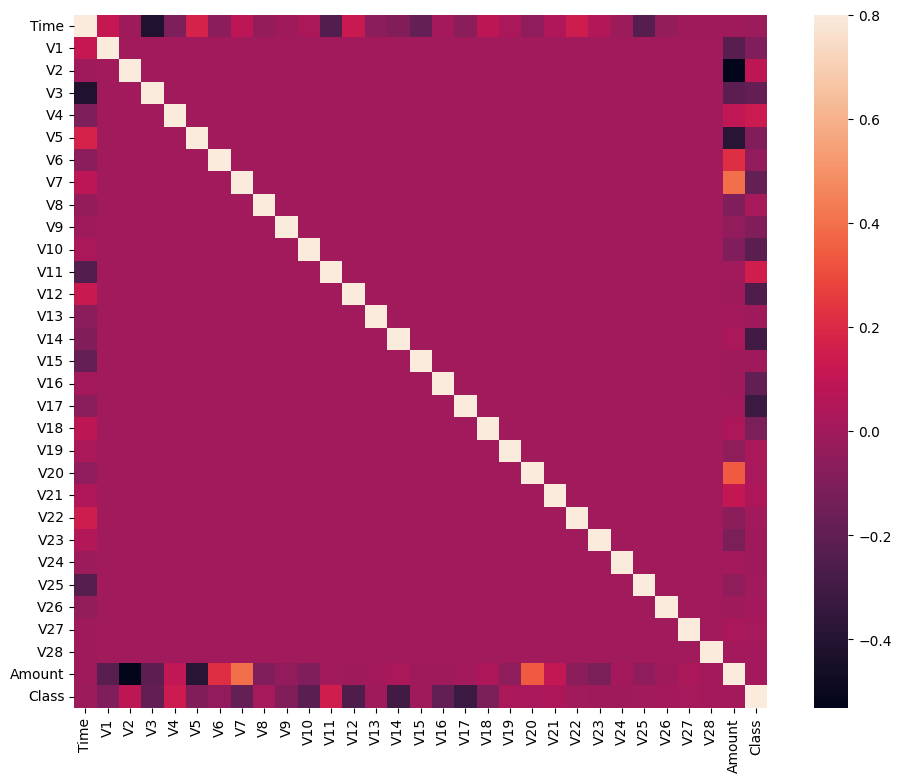

In [ ]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()


4. Model Development

In [ ]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values


(284807, 30)
(284807,)


In [ ]:
# split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.9990
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.69      0.70        98

    accuracy                           1.00     56962
   macro avg       0.85      0.85      0.85     56962
weighted avg       1.00      1.00      1.00     56962

------------------------------------------------------------


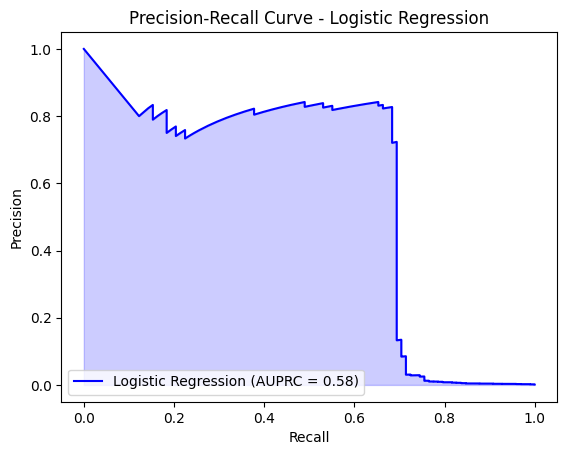

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Initialize Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model
logistic_model.fit(xTrain, yTrain)

# Make predictions and get prediction probabilities
yPred_logistic = logistic_model.predict(xTest)
yPredProb_logistic = logistic_model.predict_proba(xTest)[:, 1]

# Calculate accuracy
accuracy_logistic = accuracy_score(yTest, yPred_logistic)

# Print Logistic Regression performance
print("Model: Logistic Regression")
print(f"Accuracy: {accuracy_logistic:.4f}")
print("Classification Report:")
print(classification_report(yTest, yPred_logistic))
print("-" * 60)

# Calculate Precision-Recall curve and AUPRC
precision_logistic, recall_logistic, _ = precision_recall_curve(yTest, yPredProb_logistic)
auprc_logistic = auc(recall_logistic, precision_logistic)

# Plot AUPRC with color
plt.figure()
plt.plot(recall_logistic, precision_logistic, color='blue', label=f'Logistic Regression (AUPRC = {auprc_logistic:.2f})')
plt.fill_between(recall_logistic, precision_logistic, color='blue', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression')
plt.legend(loc='lower left')
plt.show()


Model: Decision Tree
Accuracy: 0.9991
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.80      0.74        98

    accuracy                           1.00     56962
   macro avg       0.85      0.90      0.87     56962
weighted avg       1.00      1.00      1.00     56962

------------------------------------------------------------


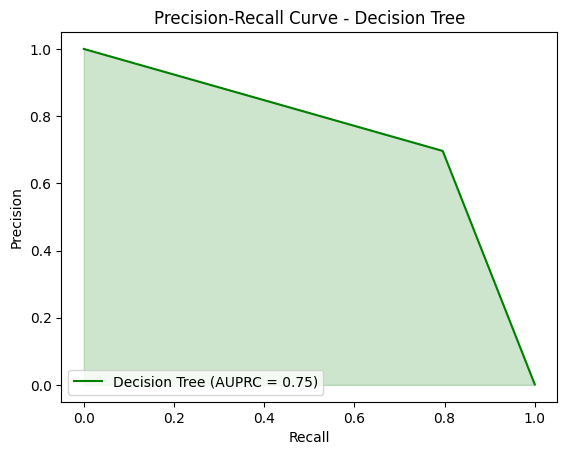

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve, auc, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Initialize Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree_model.fit(xTrain, yTrain)

# Make predictions and get prediction probabilities
yPred_tree = decision_tree_model.predict(xTest)
yPredProb_tree = decision_tree_model.predict_proba(xTest)[:, 1]

# Calculate accuracy
accuracy_tree = accuracy_score(yTest, yPred_tree)

# Print Decision Tree performance
print("Model: Decision Tree")
print(f"Accuracy: {accuracy_tree:.4f}")
print("Classification Report:")
print(classification_report(yTest, yPred_tree))
print("-" * 60)

# Calculate Precision-Recall curve and AUPRC
precision_tree, recall_tree, _ = precision_recall_curve(yTest, yPredProb_tree)
auprc_tree = auc(recall_tree, precision_tree)

# Plot AUPRC with color
plt.figure()
plt.plot(recall_tree, precision_tree, color='green', label=f'Decision Tree (AUPRC = {auprc_tree:.2f})')
plt.fill_between(recall_tree, precision_tree, color='green', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Decision Tree')
plt.legend(loc='lower left')
plt.show()


Model: Random Forest
Accuracy: 0.9996
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962

------------------------------------------------------------


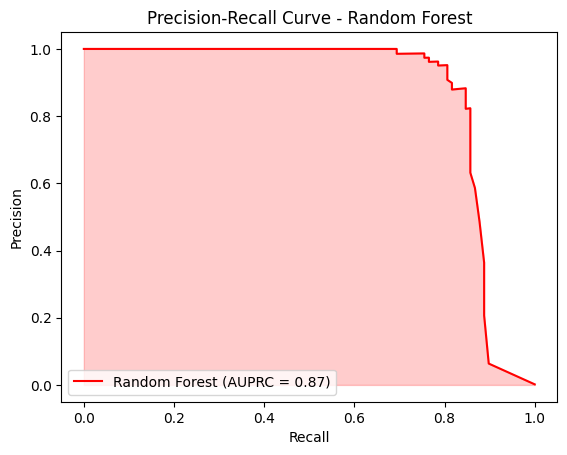

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, auc, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Initialize Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Train the model
random_forest_model.fit(xTrain, yTrain)

# Make predictions and get prediction probabilities
yPred_forest = random_forest_model.predict(xTest)
yPredProb_forest = random_forest_model.predict_proba(xTest)[:, 1]

# Calculate accuracy
accuracy_forest = accuracy_score(yTest, yPred_forest)

# Print Random Forest performance
print("Model: Random Forest")
print(f"Accuracy: {accuracy_forest:.4f}")
print("Classification Report:")
print(classification_report(yTest, yPred_forest))
print("-" * 60)

# Calculate Precision-Recall curve and AUPRC
precision_forest, recall_forest, _ = precision_recall_curve(yTest, yPredProb_forest)
auprc_forest = auc(recall_forest, precision_forest)

# Plot AUPRC with color
plt.figure()
plt.plot(recall_forest, precision_forest, color='red', label=f'Random Forest (AUPRC = {auprc_forest:.2f})')
plt.fill_between(recall_forest, precision_forest, color='red', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest')
plt.legend(loc='lower left')
plt.show()


In [ ]:
from imblearn.combine import SMOTEENN
# Apply SMOTE-ENN to the training data
smote_enn = SMOTEENN(random_state=42,sampling_strategy = 'minority')
xTrain_res, yTrain_res = smote_enn.fit_resample(xTrain, yTrain)

# Print the shapes of the training and testing sets
print("Training set shape after SMOTE-ENN:", xTrain_res.shape, yTrain_res.shape)
print("Testing set shape:", xTest.shape, yTest.shape)


Training set shape after SMOTE-ENN: (428652, 30) (428652,)
Testing set shape: (56962, 30) (56962,)


In [ ]:
from collections import Counter

# Before SMOTE-ENN
print('Before SMOTE-ENN:')
print(f'Class distribution in yTrain: {Counter(yTrain)}')

# After SMOTE-ENN
print('\nAfter SMOTE-ENN:')
print(f'Class distribution in yTrain_res: {Counter(yTrain_res)}')

Before SMOTE-ENN:
Class distribution in yTrain: Counter({0: 227451, 1: 394})

After SMOTE-ENN:
Class distribution in yTrain_res: Counter({1: 218649, 0: 210003})


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.metrics import classification_report_imbalanced

# Initialize Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model
logistic_model.fit(xTrain_res, yTrain_res)

# Make predictions
yPred_logistic = logistic_model.predict(xTest)

# Calculate accuracy
accuracy_logistic = accuracy_score(yTest, yPred_logistic)

# Print Logistic Regression performance
print("Model: Logistic Regression")
print(f"Accuracy: {accuracy_logistic:.4f}")
print("Classification Report:")
print(classification_report(yTest, yPred_logistic))
print("-" * 60)



Model: Logistic Regression
Accuracy: 0.9675
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.89      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.93      0.53     56962
weighted avg       1.00      0.97      0.98     56962

------------------------------------------------------------


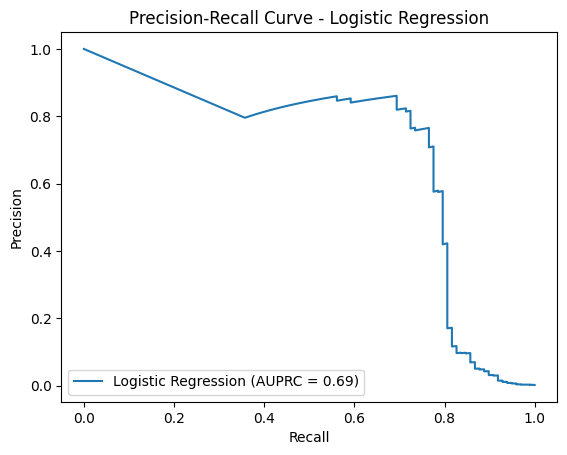

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
yPredProb_logistic = logistic_model.predict_proba(xTest)[:, 1]
# Calculate Precision-Recall curve and AUPRC
precision, recall, _ = precision_recall_curve(yTest, yPredProb_logistic)
auprc = auc(recall, precision)

# Plot AUPRC
plt.figure()
plt.plot(recall, precision, label=f'Logistic Regression (AUPRC = {auprc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression')
plt.legend(loc='lower left')
plt.show()

Model: Decision Tree
Accuracy: 0.9975
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.39      0.79      0.52        98

    accuracy                           1.00     56962
   macro avg       0.70      0.89      0.76     56962
weighted avg       1.00      1.00      1.00     56962

------------------------------------------------------------


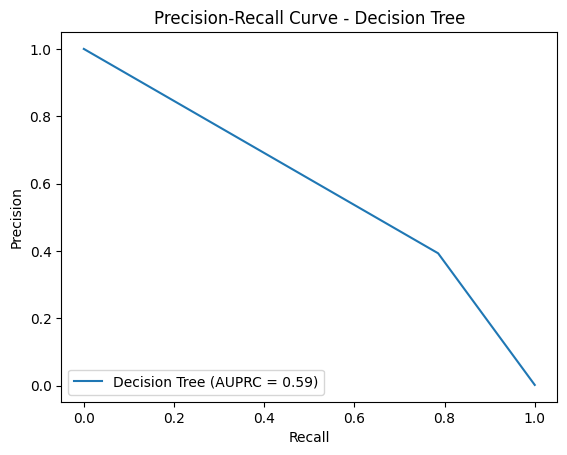

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve, auc, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Initialize Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree_model.fit(xTrain_res, yTrain_res)

# Make predictions and get prediction probabilities
yPred_tree = decision_tree_model.predict(xTest)
yPredProb_tree = decision_tree_model.predict_proba(xTest)[:, 1]

# Calculate accuracy
accuracy_tree = accuracy_score(yTest, yPred_tree)

# Print Decision Tree performance
print("Model: Decision Tree")
print(f"Accuracy: {accuracy_tree:.4f}")
print("Classification Report:")
print(classification_report(yTest, yPred_tree))
print("-" * 60)

# Calculate Precision-Recall curve and AUPRC
precision, recall, _ = precision_recall_curve(yTest, yPredProb_tree)
auprc = auc(recall, precision)

# Plot AUPRC
plt.figure()
plt.plot(recall, precision, label=f'Decision Tree (AUPRC = {auprc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Decision Tree')
plt.legend(loc='lower left')
plt.show()


Model: Random Forest
Accuracy: 0.9995
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.84      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962

------------------------------------------------------------


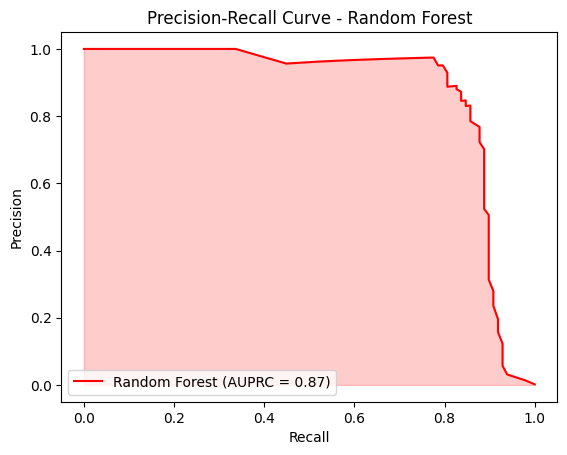

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, auc, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Initialize Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Train the model
random_forest_model.fit(xTrain_res, yTrain_res)

# Make predictions and get prediction probabilities
yPred_forest = random_forest_model.predict(xTest)
yPredProb_forest = random_forest_model.predict_proba(xTest)[:, 1]

# Calculate accuracy
accuracy_forest = accuracy_score(yTest, yPred_forest)

# Print Random Forest performance
print("Model: Random Forest")
print(f"Accuracy: {accuracy_forest:.4f}")
print("Classification Report:")
print(classification_report(yTest, yPred_forest))
print("-" * 60)

# Calculate Precision-Recall curve and AUPRC
precision, recall, _ = precision_recall_curve(yTest, yPredProb_forest)
auprc = auc(recall, precision)

# Plot AUPRC with color
plt.figure()
plt.plot(recall, precision, color='red', label=f'Random Forest (AUPRC = {auprc:.2f})')
plt.fill_between(recall, precision, color='red', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest')
plt.legend(loc='lower left')
plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:03:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBoost
Accuracy: 0.9993
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.85      0.81        98

    accuracy                           1.00     56962
   macro avg       0.89      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962

------------------------------------------------------------


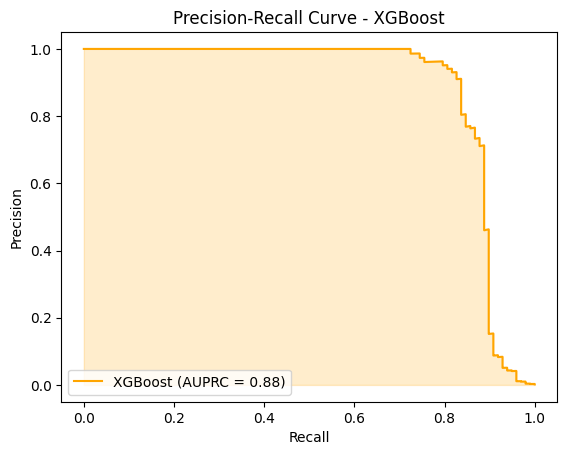

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve, auc, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Initialize XGBoost model
xgboost_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
xgboost_model.fit(xTrain_res, yTrain_res)

# Make predictions and get prediction probabilities
yPred_xgb = xgboost_model.predict(xTest)
yPredProb_xgb = xgboost_model.predict_proba(xTest)[:, 1]

# Calculate accuracy
accuracy_xgb = accuracy_score(yTest, yPred_xgb)

# Print XGBoost performance
print("Model: XGBoost")
print(f"Accuracy: {accuracy_xgb:.4f}")
print("Classification Report:")
print(classification_report(yTest, yPred_xgb))
print("-" * 60)

# Calculate Precision-Recall curve and AUPRC
precision_xgb, recall_xgb, _ = precision_recall_curve(yTest, yPredProb_xgb)
auprc_xgb = auc(recall_xgb, precision_xgb)

# Plot AUPRC with color
plt.figure()
plt.plot(recall_xgb, precision_xgb, color='orange', label=f'XGBoost (AUPRC = {auprc_xgb:.2f})')
plt.fill_between(recall_xgb, precision_xgb, color='orange', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - XGBoost')
plt.legend(loc='lower left')
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, auc, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Initialize SVM model with probability estimates enabled
svm_model = SVC(probability=True, random_state=42)

# Train the model
svm_model.fit(xTrain_res, yTrain_res)

# Make predictions and get prediction probabilities
yPred_svm = svm_model.predict(xTest)
yPredProb_svm = svm_model.predict_proba(xTest)[:, 1]

# Calculate accuracy
accuracy_svm = accuracy_score(yTest, yPred_svm)

# Print SVM performance
print("Model: SVM")
print(f"Accuracy: {accuracy_svm:.4f}")
print("Classification Report:")
print(classification_report(yTest, yPred_svm))
print("-" * 60)

# Calculate Precision-Recall curve and AUPRC
precision_svm, recall_svm, _ = precision_recall_curve(yTest, yPredProb_svm)
auprc_svm = auc(recall_svm, precision_svm)

# Plot AUPRC with color
plt.figure()
plt.plot(recall_svm, precision_svm, color='purple', label=f'SVM (AUPRC = {auprc_svm:.2f})')
plt.fill_between(recall_svm, precision_svm, color='purple', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - SVM')
plt.legend(loc='lower left')
plt.show()


In [ ]:
from sklearn.naive_bayes import GaussianNB
# Initialize the Naive Bayes classifier (Gaussian Naive Bayes for continuous features)
nb_classifier = GaussianNB()

# Train the Naive Bayes classifier
nb_classifier.fit(xTrain_res, yTrain_res)

# Predictions on the test set
yPred = nb_classifier.predict(xTest)

# Calculate accuracy
accuracy = accuracy_score(yTest, yPred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(yTest, yPred))

Accuracy: 0.9924
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.15      0.70      0.24        98

    accuracy                           0.99     56962
   macro avg       0.57      0.85      0.62     56962
weighted avg       1.00      0.99      0.99     56962

